In [2]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
cleveland = pd.read_csv('heart.csv')
cleveland.loc[0:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
#removing missing data
data= cleveland[~cleveland.isin(['?'])]
data.loc[0:]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
#drop rows with NA values from dataframe
data=data.dropna(axis=0)
data.loc[0:]
print(data.shape) #to print shape
print(data.dtypes)#to print datatypes
data.describe() #to print data characteristics


(1025, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


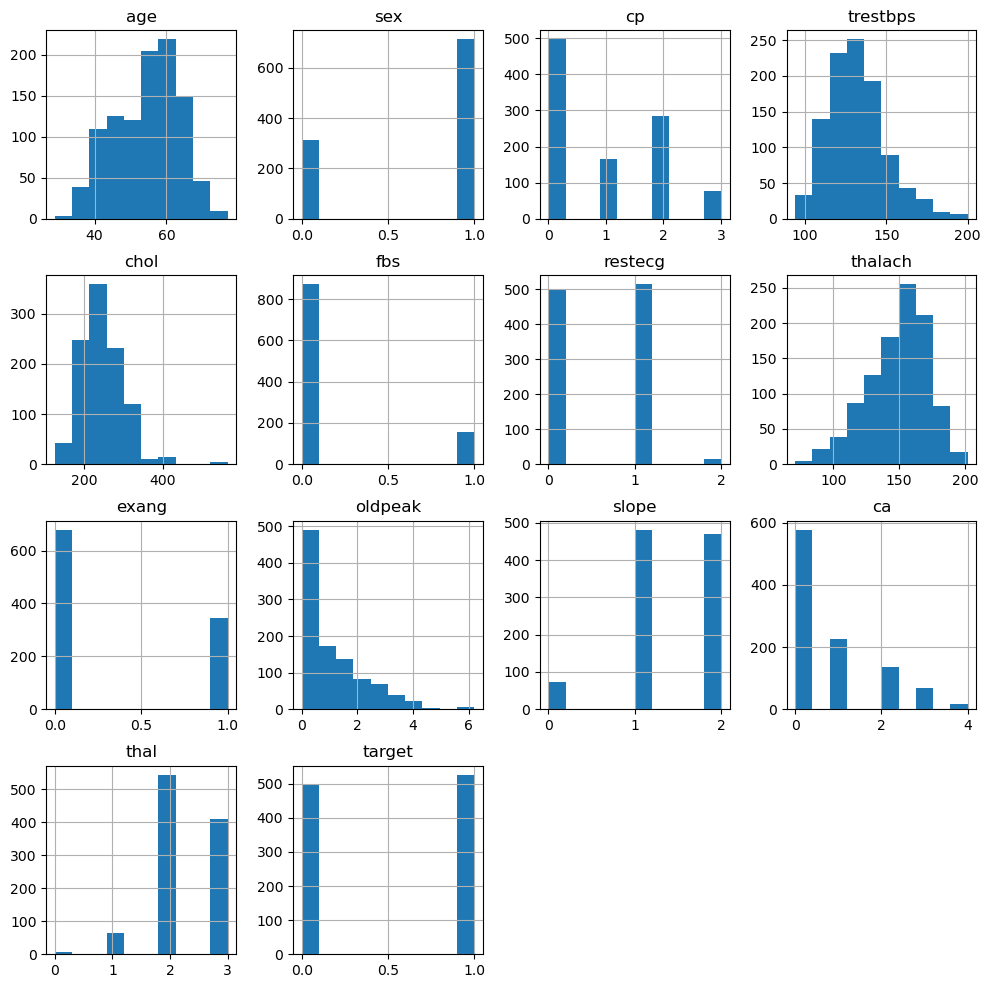

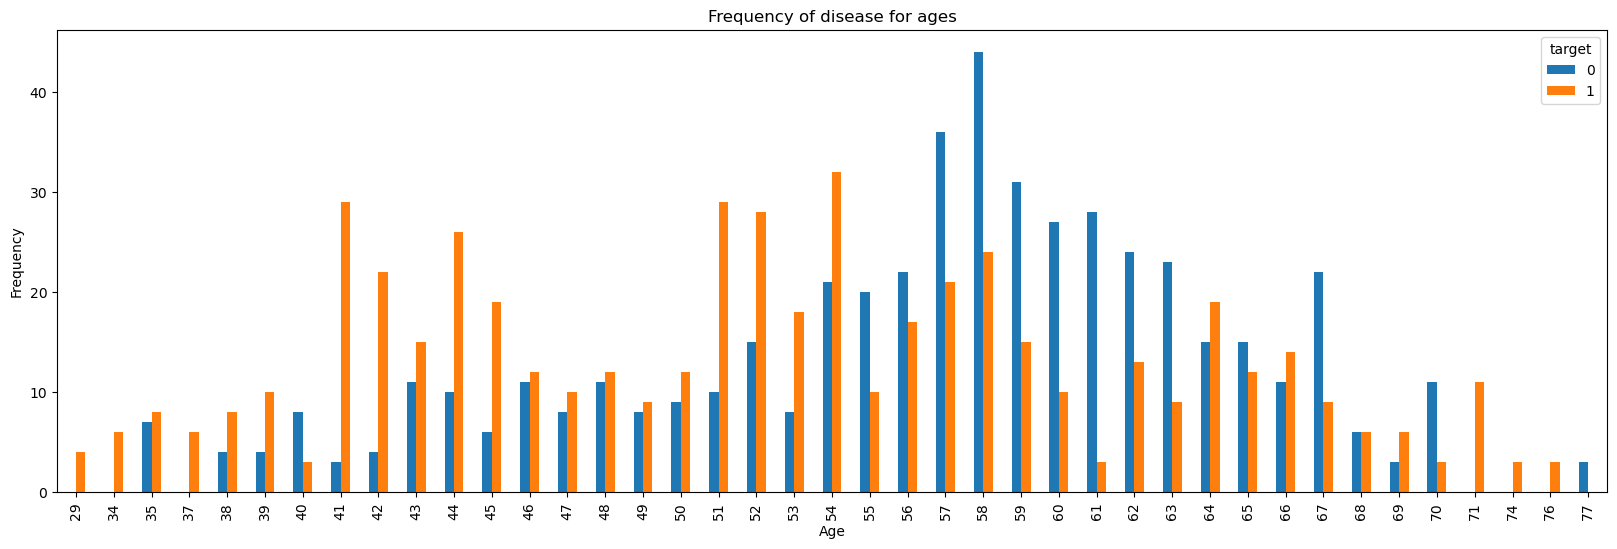

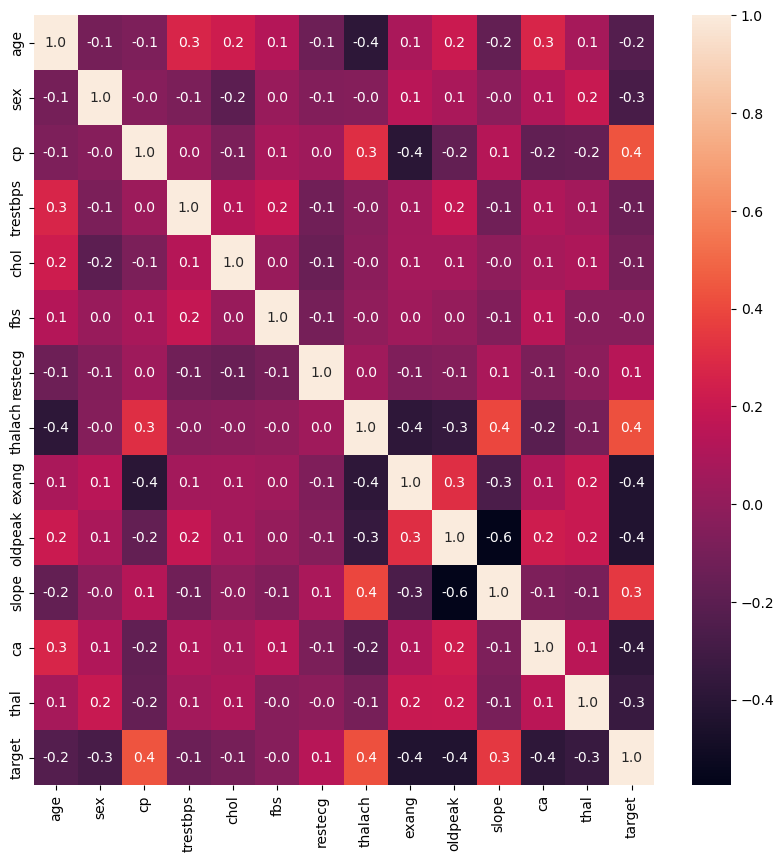

In [5]:
#Data Visualization
data.hist(figsize=(12,12))
plt.show()
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Frequency of disease for ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()


In [6]:
X = np.array(data.drop(labels=['target'], axis=1))
y = np.array(data['target'])
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std


In [7]:
#table for X and y for training

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)
Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)

print(Y_train.shape)
print(Y_train[:10])
print(X_train[0])


(820, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
[ 0.834359   -1.51170646 -0.91575542  0.36487493  0.93082177  2.38733039
  0.89125488 -1.87497657 -0.71228712  0.70540823 -0.6241209   2.17981673
 -0.52212231]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
82/82 [==============================] - 1

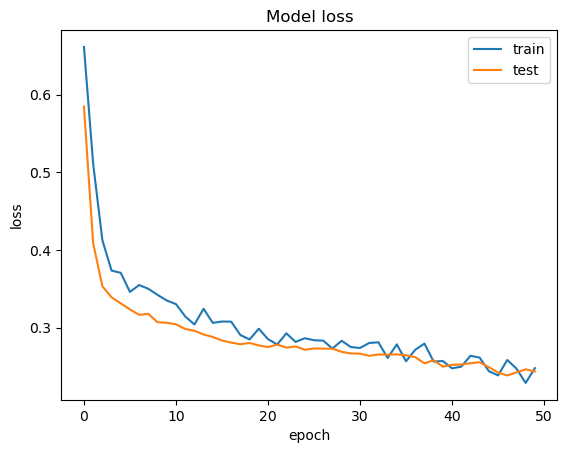

In [8]:
#Training using ANN

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras import regularizers

# Define a function to build the Keras model
def create_model():
    # Create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))

    # Compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()
print(model.summary())

# Fit the model to the training data
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=10)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()


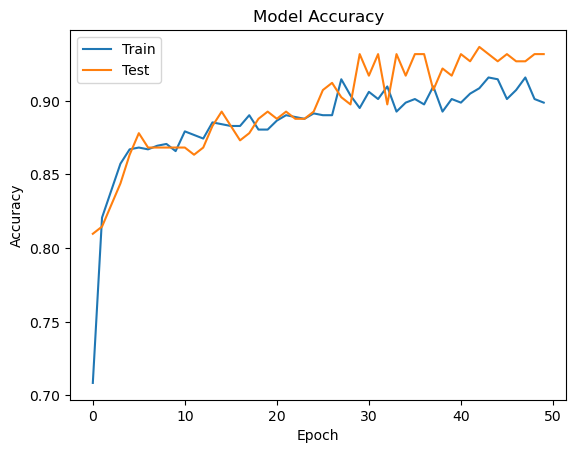

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()


In [9]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()
Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1
print(Y_train_binary[:20])

# Define a new Keras model for binary classification
def create_binary_model():
    # Create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()
print(binary_model.summary())

# Fit the binary model on the training data
history = binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)


[0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                224       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5

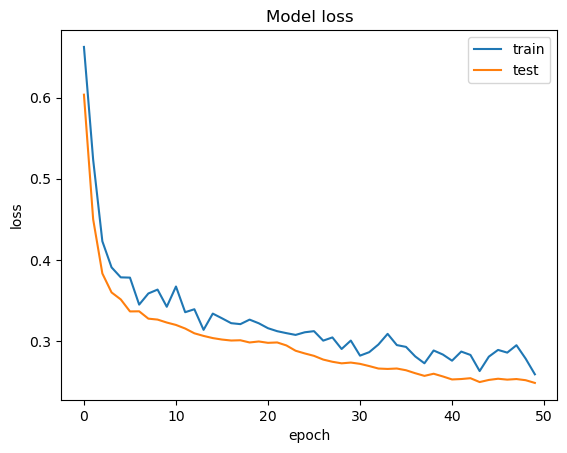

In [13]:
#model loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()


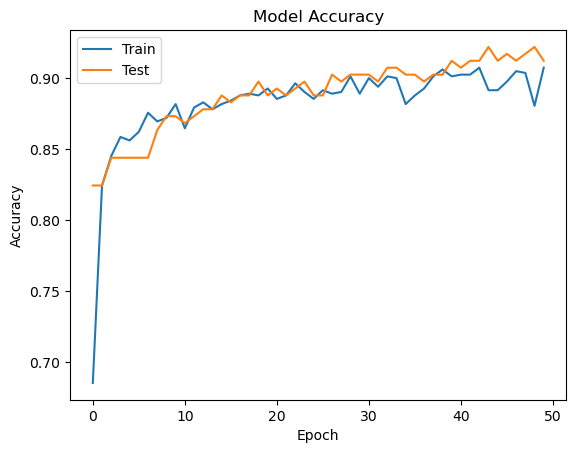

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()


In [11]:
# GENETIC ALGORITHM IMPLEMENTATION

import random
best=100000
populations =[[1,0,0,0,1],[1,1,1,0,1],[0,1,0,0,0],[1,0,0,1,1]]
parents=[]
new_populations=[]
print(populations)


[[1, 0, 0, 0, 1], [1, 1, 1, 0, 1], [0, 1, 0, 0, 0], [1, 0, 0, 1, 1]]


In [12]:
# Fitness score calculation
def fitness_score():
    global populations, best

    fit_value = []
    fit_scores= []

    for i in range(4):
        chromosome_value = 0
        for j in range(4, 0, -1):
            chromosome_value += populations[i][j] * (2 ** (4 - j))
        chromosome_value = -1 * chromosome_value if populations[i][0] == 1 else chromosome_value
        print(chromosome_value)
        fit_value.append(-(chromosome_value ** 2) + 5)
    print(fit_value)
    fit_value,populations=zip(*sorted(zip(fit_value,populations),reverse=True))
    best= fit_value[0]

# Call the fitness_score() function
fitness_score()


-1
-13
8
-3
[4, -164, -59, -4]


In [13]:
# Selecting parents
def selectparent():
    global parents
    #global populations, parents
    parents = populations[0:2]
    print(type(parents))
    print(parents)

selectparent()


<class 'tuple'>
([1, 0, 0, 0, 1], [1, 0, 0, 1, 1])


In [14]:
# Single-point crossover
def crossover():
    global parents
    cross_point = random.randint(0, 5)
    parents= parents+ tuple([(parents[0][0:cross_point+1] + parents[1][cross_point+1:6])])
    parents= parents+ tuple([(parents[1][0:cross_point+1] + parents[0][cross_point+1:6])])
    print(parents)

# Call the crossover() function
crossover()


([1, 0, 0, 0, 1], [1, 0, 0, 1, 1], [1, 0, 0, 0, 1], [1, 0, 0, 1, 1])


In [15]:
# Mutation
def mutation():
    global populations, parents
    mute = random.randint(0, 49)
    if mute == 20:
        x = random.randint(0, 3)
        y = random.randint(0, 4)
        parents[x][y] = 1 - parents[x][y]
    populations = parents
    print(populations)

# Call the mutation() function
mutation()


([1, 0, 0, 0, 1], [1, 0, 0, 1, 1], [1, 0, 0, 0, 1], [1, 0, 0, 1, 1])


In [16]:
for i in range(1000):
  fitness_score()
  selectparent()
  crossover()
  mutation()
print("The best score:")
print(best)
print("Sequence...")
print(populations[0])


-1
-3
-1
-3
[4, -4, 4, -4]
<class 'tuple'>
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
-1
-1
-1
-1
[4, 4, 4, 4]
<class 'tuple'>
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
-1
-1
-1
-1
[4, 4, 4, 4]
<class 'tuple'>
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
-1
-1
-1
-1
[4, 4, 4, 4]
<class 'tuple'>
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
-1
-1
-1
-1
[4, 4, 4, 4]
<class 'tuple'>
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1])
([1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1], [1, 0, 0, 0, 1

In [17]:
#Results:
# generate classification report using predictions for categorical model.
from sklearn.metrics import classification_report, accuracy_score
categorical_pred = np.argmax (model.predict (X_test), axis=1)
print('Results for Categorical Model')
print (accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

7/7 [==============================] - 0s 2ms/step
Results for Categorical Model
0.9219512195121952
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       100
           1       0.92      0.92      0.92       105

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



In [18]:
# generate classification report using predictions for binary model
from sklearn.metrics import classification_report, accuracy_score
# generate classification report using predictions for binary model
binary_pred = np.round(binary_model.predict (X_test)).astype (int)
print('Results for Binary Model')
print (accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))


7/7 [==============================] - 0s 4ms/step
Results for Binary Model
0.9121951219512195
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       100
           1       0.89      0.94      0.92       105

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205

